1. Loading the mnist dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [2]:
print(f"Shape of training data: {x_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of testing data: {x_test.shape}")
print(f"Shape of testing labels: {y_test.shape}")
print(f"Image size: {x_train.shape[1]}x{x_train.shape[2]} pixels")
print(f"Number of classes: {len(set(y_train))}")

Shape of training data: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of testing data: (10000, 28, 28)
Shape of testing labels: (10000,)
Image size: 28x28 pixels
Number of classes: 10


Therefore the size of image is 28*28 pixel.

There are 10 number of classes.

2. Pre-processing

Reshaping the data

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

Normalizing the pixel

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
print(f"Shape of training data after reshaping: {x_train.shape}")
print(f"Shape of testing data after reshaping: {x_test.shape}")

Shape of training data after reshaping: (60000, 28, 28, 1)
Shape of testing data after reshaping: (10000, 28, 28, 1)


Reshaping makes the images fit the CNN, and normalization makes the colors easy for the CNN to understand.

3. Design and Compile CNN Model

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


c:\Users\cheta\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Summary of model

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

4. Train the CNN Model

In [9]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9603 - loss: 0.1293 - val_accuracy: 0.9868 - val_loss: 0.0373
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9869 - loss: 0.0427 - val_accuracy: 0.9862 - val_loss: 0.0411
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9904 - loss: 0.0287 - val_accuracy: 0.9898 - val_loss: 0.0292
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9930 - loss: 0.0207 - val_accuracy: 0.9869 - val_loss: 0.0424
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9948 - loss: 0.0154 - val_accuracy: 0.9910 - val_loss: 0.0311


Model Evaluation

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9910 - loss: 0.0311
Test loss: 0.031054846942424774
Test accuracy: 0.9909999966621399


Plotting the graph of accuracy and loss

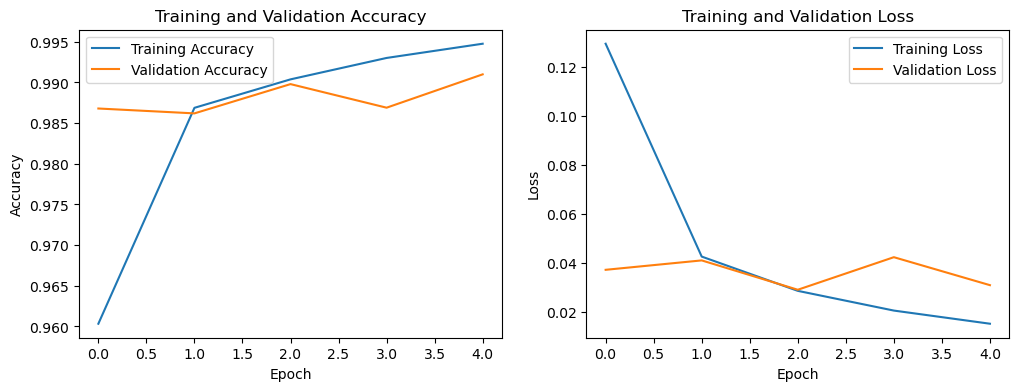

In [11]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Accuracy goes up: The model is getting better at recognizing digits.

Loss goes down: The model is making fewer mistakes.